In [82]:
import pandas as pd
import numpy as np 
import os

In [84]:
import os
import pandas as pd

def count_images_per_label_df(root_dir):
    records = []
    exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.JPG')
    
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)
        if not os.path.isdir(label_path):
            continue
        
        image_files = [f for f in os.listdir(label_path) if f.lower().endswith(exts)]
        records.append({'Diseases':label, 'Count': len(image_files)})

        
    #df_counts = pd.DataFrame(records)
    #df_counts = df_counts.reset_index(drop=True)
    return records


train_root = "/Users/mertgenc/Desktop/aı_datasets/tomato/train"
val_root = "/Users/mertgenc/Desktop/aı_datasets/tomato/val"

df_train = count_images_per_label_df(train_root)
df_val = count_images_per_label_df(val_root)

print(df_train)
print(df_val)


[{'Diseases': 'Tomato___Target_Spot', 'Count': 1000}, {'Diseases': 'Tomato___Late_blight', 'Count': 1000}, {'Diseases': 'Tomato___Tomato_mosaic_virus', 'Count': 1000}, {'Diseases': 'Tomato___Leaf_Mold', 'Count': 1000}, {'Diseases': 'Tomato___Bacterial_spot', 'Count': 1000}, {'Diseases': 'Tomato___Early_blight', 'Count': 1000}, {'Diseases': 'Tomato___healthy', 'Count': 1000}, {'Diseases': 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Count': 1000}, {'Diseases': 'Tomato___Spider_mites Two-spotted_spider_mite', 'Count': 1000}, {'Diseases': 'Tomato___Septoria_leaf_spot', 'Count': 1000}]
[{'Diseases': 'Tomato___Target_Spot', 'Count': 100}, {'Diseases': 'Tomato___Late_blight', 'Count': 100}, {'Diseases': 'Tomato___Tomato_mosaic_virus', 'Count': 100}, {'Diseases': 'Tomato___Leaf_Mold', 'Count': 100}, {'Diseases': 'Tomato___Bacterial_spot', 'Count': 100}, {'Diseases': 'Tomato___Early_blight', 'Count': 100}, {'Diseases': 'Tomato___healthy', 'Count': 100}, {'Diseases': 'Tomato___Tomato_Yellow_Leaf_

In [87]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_merge= pd.merge(df_train, df_val, on='Diseases', suffixes=('_train', '_val'))

In [90]:
df_merge

,Diseases,Count_train,Count_val
0,Tomato___Target_Spot,1000,100
1,Tomato___Late_blight,1000,100
2,Tomato___Tomato_mosaic_virus,1000,100
3,Tomato___Leaf_Mold,1000,100
4,Tomato___Bacterial_spot,1000,100
5,Tomato___Early_blight,1000,100
6,Tomato___healthy,1000,100
7,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1000,100
8,Tomato___Spider_mites Two-spotted_spider_mite,1000,100
9,Tomato___Septoria_leaf_spot,1000,100


In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 30,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    zoom_range= 0.2,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=False ,
    brightness_range= (0.8, 1.2),
    fill_mode ='reflect',   
)

### Gerçekçi verilerle test edilmesi için sadece rescale
val_datagen = ImageDataGenerator(
    rescale=1./255
)


train_gen = train_datagen.flow_from_directory(
    directory=train_root,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    directory=val_root,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)
print(train_gen.class_indices)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()    

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,946 (437.29 KB)

 Trainable params: 111,498 (435.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [102]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('model_iki.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]


history = model.fit(
    train_gen,
    #steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=val_gen,
    #validation_steps=val_gen.samples // val_gen.batch_size,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.4319 - loss: 1.5965

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 239s 760ms/step - accuracy: 0.4323 - loss: 1.5954 - val_accuracy: 0.1590 - val_loss: 5.1363 - learning_rate: 0.0010
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.7109 - loss: 0.8407

313/313 ━━━━━━━━━━━━━━━━━━━━ 244s 778ms/step - accuracy: 0.7110 - loss: 0.8405 - val_accuracy: 0.5720 - val_loss: 1.2980 - learning_rate: 0.0010
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.7769 - loss: 0.6451

313/313 ━━━━━━━━━━━━━━━━━━━━ 241s 768ms/step - accuracy: 0.7770 - loss: 0.6451 - val_accuracy: 0.6790 - val_loss: 1.0660 - learning_rate: 0.0010
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 240s 766ms/step - accuracy: 0.8067 - loss: 0.5584 - val_accuracy: 0.5590 - val_loss: 1.9210 - learning_rate: 0.0010
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.8420 - loss: 0.4603

313/313 ━━━━━━━━━━━━━━━━━━━━ 244s 780ms/step - accuracy: 0.8420 - loss: 0.4602 - val_accuracy: 0.7440 - val_loss: 0.7364 - learning_rate: 0.0010
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 270s 860ms/step - accuracy: 0.8674 - loss: 0.3965 - val_accuracy: 0.7070 - val_loss: 1.0475 - learning_rate: 0.0010
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.8717 - loss: 0.3760

313/313 ━━━━━━━━━━━━━━━━━━━━ 267s 851ms/step - accuracy: 0.8717 - loss: 0.3760 - val_accuracy: 0.8090 - val_loss: 0.6029 - learning_rate: 0.0010
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 278s 888ms/step - accuracy: 0.8895 - loss: 0.3332 - val_accuracy: 0.6510 - val_loss: 1.2862 - learning_rate: 0.0010
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.9072 - loss: 0.2889

313/313 ━━━━━━━━━━━━━━━━━━━━ 284s 907ms/step - accuracy: 0.9072 - loss: 0.2889 - val_accuracy: 0.8430 - val_loss: 0.4032 - learning_rate: 0.0010
Epoch 10/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9044 - loss: 0.2960

313/313 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9044 - loss: 0.2959 - val_accuracy: 0.8650 - val_loss: 0.3633 - learning_rate: 0.0010
Epoch 11/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.9171 - loss: 0.2615 - val_accuracy: 0.3650 - val_loss: 4.4006 - learning_rate: 0.0010
Epoch 12/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9145 - loss: 0.2447 - val_accuracy: 0.6560 - val_loss: 1.9473 - learning_rate: 0.0010
Epoch 13/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.9217 - loss: 0.2467
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
313/313 ━━━━━━━━━━━━━━━━━━━━ 307s 979ms/step - accuracy: 0.9217 - loss: 0.2467 - val_accuracy: 0.8720 - val_loss: 0.4128 - learning_rate: 0.0010
Epoch 14/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.9360 - loss: 0.1869

313/313 ━━━━━━━━━━━━━━━━━━━━ 258s 823ms/step - accuracy: 0.9360 - loss: 0.1869 - val_accuracy: 0.9270 - val_loss: 0.2141 - learning_rate: 2.0000e-04
Epoch 15/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 248s 793ms/step - accuracy: 0.9478 - loss: 0.1626 - val_accuracy: 0.9200 - val_loss: 0.2847 - learning_rate: 2.0000e-04
Epoch 16/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 251s 801ms/step - accuracy: 0.9516 - loss: 0.1522 - val_accuracy: 0.8870 - val_loss: 0.3290 - learning_rate: 2.0000e-04
Epoch 17/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.9508 - loss: 0.1455

313/313 ━━━━━━━━━━━━━━━━━━━━ 246s 785ms/step - accuracy: 0.9508 - loss: 0.1455 - val_accuracy: 0.9340 - val_loss: 0.1921 - learning_rate: 2.0000e-04
Epoch 18/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.9558 - loss: 0.1413

313/313 ━━━━━━━━━━━━━━━━━━━━ 248s 793ms/step - accuracy: 0.9558 - loss: 0.1413 - val_accuracy: 0.9430 - val_loss: 0.1594 - learning_rate: 2.0000e-04
Epoch 19/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 245s 782ms/step - accuracy: 0.9532 - loss: 0.1371 - val_accuracy: 0.9410 - val_loss: 0.1735 - learning_rate: 2.0000e-04
Epoch 20/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 776ms/step - accuracy: 0.9615 - loss: 0.1201 - val_accuracy: 0.9310 - val_loss: 0.1863 - learning_rate: 2.0000e-04
Epoch 21/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.9590 - loss: 0.1313
Epoch 21: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
313/313 ━━━━━━━━━━━━━━━━━━━━ 246s 786ms/step - accuracy: 0.9590 - loss: 0.1313 - val_accuracy: 0.9340 - val_loss: 0.1870 - learning_rate: 2.0000e-04
Epoch 22/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 242s 772ms/step - accuracy: 0.9564 - loss: 0.1243 - val_accuracy: 0.9280 - val_loss: 0.2403 - learning_rate: 4.0000e-05
Epoch 23/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 777ms/

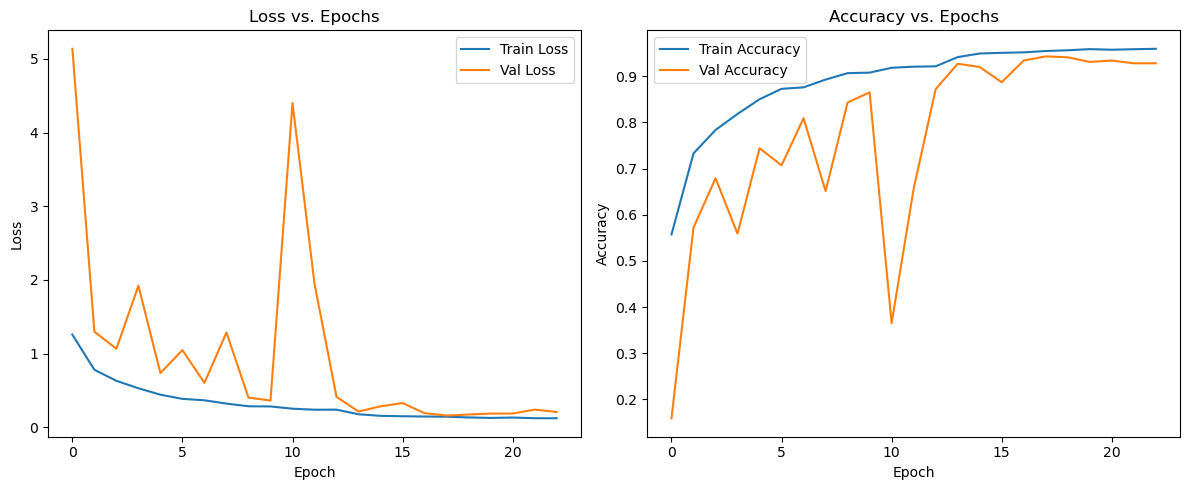

In [104]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [108]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


load = load_model('model_iki.h5')

In [128]:
loss, accuracy = load.evaluate(val_gen)
print(f"Test Loss: {loss:.4f}")
print(f"Test(Accuracy): {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9523 - loss: 0.1366
Test Loss: 0.1594
Test(Accuracy): 0.9430


In [129]:

img = image.load_img('mv.jpg', target_size=(256, 256))  

img_array = image.img_to_array(img)


img_array = img_array / 255.0

input_data = np.expand_dims(img_array, axis=0)


In [130]:
###
prediction = load.predict(input_data)
print("Model Output:", prediction)

predicted_class = np.argmax(prediction, axis=1)
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model Output: [[2.7166667e-08 1.0322419e-02 8.6701593e-06 3.0446548e-05 1.0264090e-03
  4.9168870e-05 7.0275899e-05 6.8177133e-06 9.8844868e-01 3.7070073e-05]]
Predicted Class: [8]


##### {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}